In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_person = pd.read_excel ('data/bank.xlsx', sheet_name=0)
df_loan = pd.read_excel ('data/bank.xlsx', sheet_name=1)
df_trans = pd.read_excel ('data/bank.xlsx', sheet_name=2)

# EDA

In [3]:
df_person.head()

,Person_ID,Loan Account Number,Relationship_Start_Date,OCCUPATION,DATE_OF_BIRTH,BUSINESS_TYPE,STATE,No_of_Mobile_No,CUSTOMER_EMAIL,GENDER,MARITAL_STATUS,REGION,BASIC_CURRENT,BASIC_SAVINGS,ATMCARD,TOTAL_PRODUCTS
0,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1.0,N,M,Married,NORTH,N,N,Y,0.0
1,4650228,347Z700193320501,2009-09-28,NaN,1969-02-05,BUSINESS,PLATEAU,1.0,N,M,0.0,NORTH,N,N,Y,1.0
2,8368795,065Z700193300001,2018-11-16,OTHERS,1970-11-14,NaN,ONDO,1.0,N,M,0.0,WEST,N,N,Y,0.0
3,7069330,632Z700193260001,2017-10-06,FARMING,1962-02-15,1,Plateau,2.0,N,M,Married,NORTH,N,N,Y,1.0
4,7282857,585Z700193330001,2017-12-29,NaN,1977-11-11,NaN,Kogi,1.0,N,F,Married,SOUTH,N,N,Y,0.0


In [4]:
df_loan.head()

,Person_ID,Loan_ID,Loan Tenure,Payment Period,Loan Amount (Principal),Loan Application Date,Loan Approval Date,Loan Disbursement Date,Loan Maturity Date,Latest Known Status,Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator
0,4664654,264Z700192670001,12,Monthly,81000.0,2019-09-24,2019-09-24,2019-09-24,2020-09-25,Current (active no arrears),0.0,0.0,0.0
1,5522372,458Z700192690001,12,Monthly,47000.0,2019-09-26,2019-09-26,2019-09-26,2020-09-25,Current (active no arrears),0.0,0.0,0.0
2,7749646,609Z700192690002,12,Monthly,53000.0,2019-09-26,2019-09-26,2019-09-26,2020-09-25,Current (active no arrears),0.0,0.0,0.0
3,8450062,317Z700192700001,12,Monthly,62000.0,2019-09-27,2019-09-27,2019-09-27,2020-09-30,Current (active no arrears),0.0,0.0,0.0
4,5518276,235Z700192730001,6,Monthly,89000.0,2019-09-30,2019-09-30,2019-09-30,2020-03-30,Closed (fully repaid),0.0,0.0,0.0


In [5]:
df_trans.head()

,TRN_DT,Person_ID,TRANS_TYPE,AMOUNT_IN_NAIRA,NARRATION
0,2019-05-06,82801,Credit,70000.0,Cash Deposit######@xxxxxxx by xxxxxxx
1,2019-05-06,82801,Credit,10000.0,UIP Trf from xxxxxxxxxxxxxxxxxxxxxx
2,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
3,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
4,2019-05-08,82801,Debit,10000.0,AWR@12140030/FCMB PH-Main Br PH ...


In [6]:
print(df_person.shape)
print(df_loan.shape)
print(df_trans.shape)

(2593, 16)
(2593, 13)
(608725, 5)


In [7]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                2593 non-null   int64         
 1   Loan Account Number      2593 non-null   object        
 2   Relationship_Start_Date  2593 non-null   datetime64[ns]
 3   OCCUPATION               1775 non-null   object        
 4   DATE_OF_BIRTH            2593 non-null   datetime64[ns]
 5   BUSINESS_TYPE            1315 non-null   object        
 6   STATE                    2593 non-null   object        
 7   No_of_Mobile_No          2593 non-null   float64       
 8   CUSTOMER_EMAIL           2593 non-null   object        
 9   GENDER                   2593 non-null   object        
 10  MARITAL_STATUS           2593 non-null   object        
 11  REGION                   2593 non-null   object        
 12  BASIC_CURRENT            2593 non-

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                2593 non-null   int64         
 1   Loan_ID                  2593 non-null   object        
 2   Loan Tenure              2593 non-null   int64         
 3   Payment Period           2593 non-null   object        
 4   Loan Amount (Principal)  2593 non-null   float64       
 5   Loan Application Date    2593 non-null   datetime64[ns]
 6   Loan Approval Date       2593 non-null   datetime64[ns]
 7   Loan Disbursement Date   2593 non-null   datetime64[ns]
 8   Loan Maturity Date       2593 non-null   datetime64[ns]
 9   Latest Known Status      1945 non-null   object        
 10  Ever 90dpd+              1945 non-null   float64       
 11  Currently ≥ 60dpd        1945 non-null   float64       
 12  Bad Indicator            1945 non-

In [9]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608725 entries, 0 to 608724
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TRN_DT           608725 non-null  datetime64[ns]
 1   Person_ID        608725 non-null  int64         
 2   TRANS_TYPE       608725 non-null  object        
 3   AMOUNT_IN_NAIRA  608725 non-null  float64       
 4   NARRATION        608617 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 23.2+ MB


In [10]:
df_loan_good = df_loan.loc[(df_loan['Bad Indicator'] == 0)]
df_loan_bad = df_loan.loc[(df_loan['Bad Indicator'] == 1)]
print(df_loan_good.shape)
print(df_loan_bad.shape)

(1345, 13)
(600, 13)


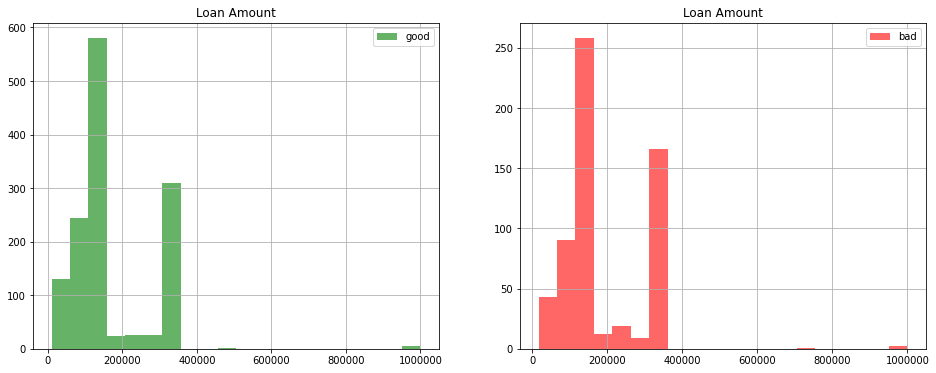

In [11]:
# Loan Amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df_loan_good['Loan Amount (Principal)'].hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
df_loan_bad['Loan Amount (Principal)'].hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax1.set_title('Loan Amount')
ax2.set_title('Loan Amount')
ax1.ticklabel_format(style='plain')
ax2.ticklabel_format(style='plain')
ax1.legend()
ax2.legend()
plt.show()

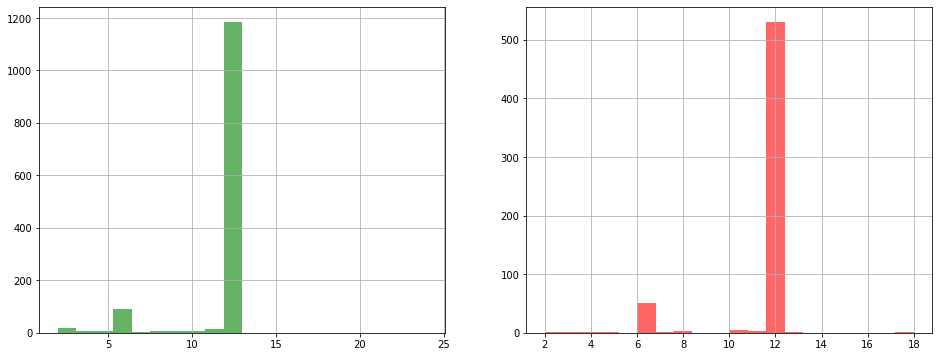

In [12]:
# Loan Tenure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_loan_good['Loan Tenure'].hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
df_loan_bad['Loan Tenure'].hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
plt.show()

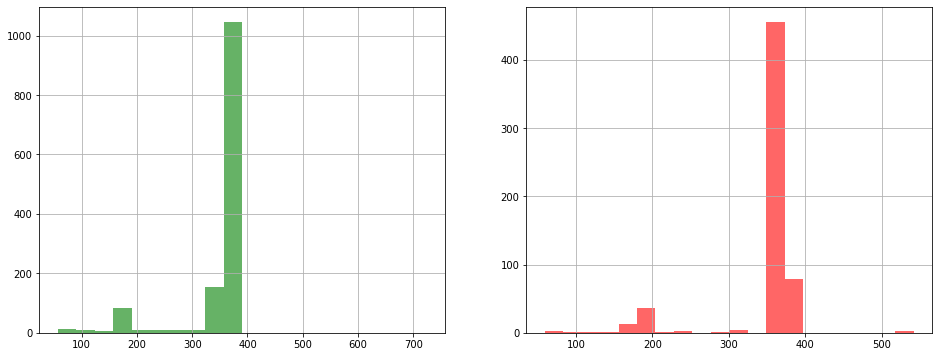

In [13]:
# Loan Duration

df_loan_good['Loan Duration'] = (df_loan_good['Loan Maturity Date'] - df_loan_good['Loan Approval Date']).dt.days
df_loan_bad['Loan Duration'] = (df_loan_bad['Loan Maturity Date'] - df_loan_bad['Loan Approval Date']).dt.days

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_loan_good['Loan Duration'].hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
df_loan_bad['Loan Duration'].hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
plt.show()

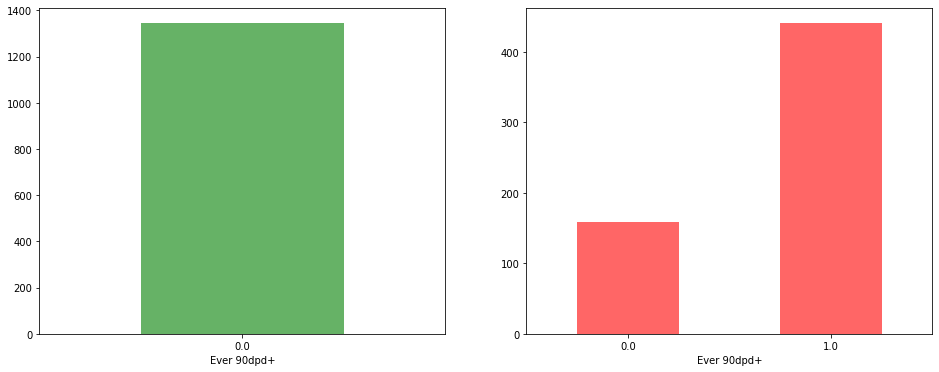

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_loan_good[['Person_ID', 'Ever 90dpd+']].groupby('Ever 90dpd+').count().plot(
    kind='bar', color='green', rot=0, ax=ax1, alpha=0.6, legend=False)
df_loan_bad[['Person_ID', 'Ever 90dpd+']].groupby('Ever 90dpd+').count().plot(
    kind='bar', color='red', rot=0, ax=ax2, alpha=0.6, legend=False)
plt.show()

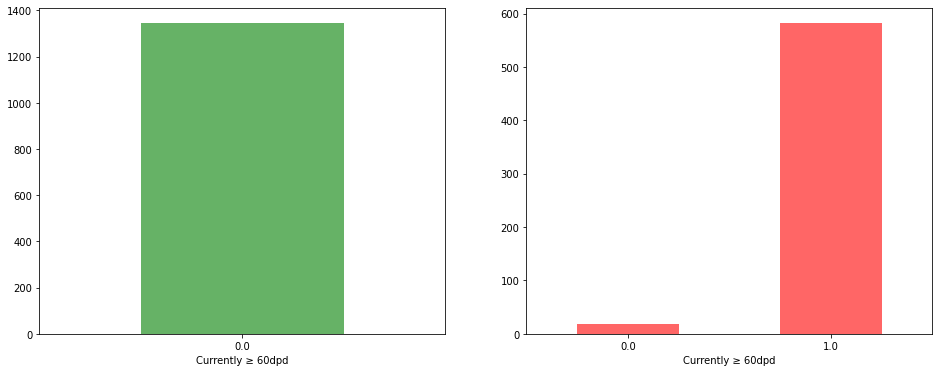

In [15]:
# Currently ≥ 60dpd
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_loan_good[['Person_ID', 'Currently ≥ 60dpd']].groupby('Currently ≥ 60dpd').count().plot(
    kind='bar', color='green', rot=0, ax=ax1, alpha=0.6, legend=False)
df_loan_bad[['Person_ID', 'Currently ≥ 60dpd']].groupby('Currently ≥ 60dpd').count().plot(
    kind='bar', color='red', rot=0, ax=ax2, alpha=0.6, legend=False)
plt.show()

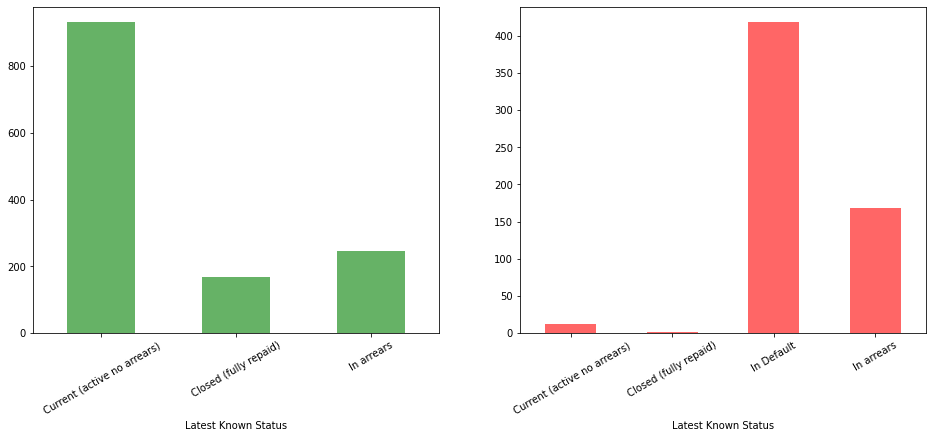

In [16]:
# Latest Known Status
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_loan_good[['Person_ID', 'Latest Known Status']].groupby('Latest Known Status').count().plot(
    kind='bar', color='green', rot=30, ax=ax1, alpha=0.6, legend=False)
df_loan_bad[['Person_ID', 'Latest Known Status']].groupby('Latest Known Status').count().plot(
    kind='bar', color='red', rot=30, ax=ax2, alpha=0.6, legend=False)
plt.show()

In [17]:
df_trans.head()

,TRN_DT,Person_ID,TRANS_TYPE,AMOUNT_IN_NAIRA,NARRATION
0,2019-05-06,82801,Credit,70000.0,Cash Deposit######@xxxxxxx by xxxxxxx
1,2019-05-06,82801,Credit,10000.0,UIP Trf from xxxxxxxxxxxxxxxxxxxxxx
2,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
3,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
4,2019-05-08,82801,Debit,10000.0,AWR@12140030/FCMB PH-Main Br PH ...


In [18]:
df_trans.groupby(['Person_ID']).mean()

,AMOUNT_IN_NAIRA
Person_ID,
82801,28714.969167
206079,16145.929792
256568,21057.713415
273959,20408.278521
274608,87307.429577
...,...
8919015,11537.444432
8922911,41165.148545
8959337,22442.995688


In [19]:
trans_dummies = pd.get_dummies(df_trans.TRANS_TYPE, drop_first=True, prefix='TRANS_TYPE')
df_trans = pd.concat([df_trans, trans_dummies], axis=1)

In [20]:
df_trans_final = df_trans.groupby(['Person_ID']).mean()

In [21]:
df_data_missing = pd.merge(df_person, df_trans_final, on='Person_ID')
df_data_missing = pd.merge(df_data_missing, df_loan, on='Person_ID')

In [22]:
print(df_person.shape)
print(df_loan.shape)
print(df_trans.shape)
print(df_data_missing.shape)

(2593, 16)
(2593, 13)
(608725, 6)
(2593, 30)


In [23]:
df_data_missing.to_csv('data/loan_data.csv', index=False)

In [24]:
df_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 0 to 2592
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                2593 non-null   int64         
 1   Loan Account Number      2593 non-null   object        
 2   Relationship_Start_Date  2593 non-null   datetime64[ns]
 3   OCCUPATION               1775 non-null   object        
 4   DATE_OF_BIRTH            2593 non-null   datetime64[ns]
 5   BUSINESS_TYPE            1315 non-null   object        
 6   STATE                    2593 non-null   object        
 7   No_of_Mobile_No          2593 non-null   float64       
 8   CUSTOMER_EMAIL           2593 non-null   object        
 9   GENDER                   2593 non-null   object        
 10  MARITAL_STATUS           2593 non-null   object        
 11  REGION                   2593 non-null   object        
 12  BASIC_CURRENT            2593 non-

# Missing Data Imputation

In [25]:
df_all_data = df_data_missing[~df_data_missing['Bad Indicator'].isnull()]

In [26]:
df_all_data.head()

,Person_ID,Loan Account Number,Relationship_Start_Date,OCCUPATION,DATE_OF_BIRTH,BUSINESS_TYPE,STATE,No_of_Mobile_No,CUSTOMER_EMAIL,GENDER,...,Payment Period,Loan Amount (Principal),Loan Application Date,Loan Approval Date,Loan Disbursement Date,Loan Maturity Date,Latest Known Status,Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator
0,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1.0,N,M,...,Monthly,316000.0,2019-11-25,2019-11-25,2019-11-25,2020-12-04,In Default,1.0,1.0,1.0
1,4650228,347Z700193320501,2009-09-28,NaN,1969-02-05,BUSINESS,PLATEAU,1.0,N,M,...,Monthly,350000.0,2019-11-28,2019-11-28,2019-11-28,2020-11-30,Current (active no arrears),0.0,0.0,0.0
2,8368795,065Z700193300001,2018-11-16,OTHERS,1970-11-14,NaN,ONDO,1.0,N,M,...,Monthly,90000.0,2019-11-26,2019-11-26,2019-11-26,2020-11-26,In arrears,0.0,0.0,0.0
4,7282857,585Z700193330001,2017-12-29,NaN,1977-11-11,NaN,Kogi,1.0,N,F,...,Monthly,145000.0,2019-11-29,2019-11-29,2019-11-29,2020-11-20,In arrears,0.0,0.0,0.0
7,6757576,761Z700193300007,2017-04-20,Artisan,1987-12-24,Artisan,Kogi,2.0,N,F,...,Monthly,132000.0,2019-11-26,2019-11-26,2019-11-26,2020-11-25,In arrears,0.0,0.0,0.0


In [27]:
df_all_data['BUSINESS_TYPE'].unique()
df_all_data['OCCUPATION'].unique()

array([nan, 'OTHERS', 'Artisan', 'Domestic trade retail', '1',
       'FARMING (POULTRY)', 'CIVIL SERVANT', 'TRADING', 'BUSINESS',
       'Self Employed', 'Business', 'SELF EMPLOYED', 'LAWYER', 'CORPER',
       'PROFESSIONAL SERVICES', 'BUILDER', 'TECHNICIAN', 'ARTISAN',
       'TRADER', 'POLICE OFFICER', 'MUSICIAN', 'STAFF', 'TRADE',
       'Entertainment Media', 'Others', 'BAKING', 'Unemployed',
       'Real Estate Mortgage', 'STUDENT', 'TRANSPORTATION', 'Agriculture',
       'ENGINEER', 'PASTOR', 'BUSINESS MAN', 'BUSINESSMAN', 'HEALTHCARE',
       'Sales', 'DRIVER', 'ELECTRICAL', 'MASTER BAKER',
       'Construction, Mining & Trades', 'CRAFTMAN'], dtype=object)

In [28]:
df_all_data['BUSINESS_TYPE'] = df_all_data['BUSINESS_TYPE'].fillna('MISSING')
df_all_data['OCCUPATION'] = df_all_data['OCCUPATION'].fillna('MISSING')

In [29]:
df_all_data.isnull().values.any()

False

In [30]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2592
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                1945 non-null   int64         
 1   Loan Account Number      1945 non-null   object        
 2   Relationship_Start_Date  1945 non-null   datetime64[ns]
 3   OCCUPATION               1945 non-null   object        
 4   DATE_OF_BIRTH            1945 non-null   datetime64[ns]
 5   BUSINESS_TYPE            1945 non-null   object        
 6   STATE                    1945 non-null   object        
 7   No_of_Mobile_No          1945 non-null   float64       
 8   CUSTOMER_EMAIL           1945 non-null   object        
 9   GENDER                   1945 non-null   object        
 10  MARITAL_STATUS           1945 non-null   object        
 11  REGION                   1945 non-null   object        
 12  BASIC_CURRENT            1945 non-

In [31]:
df_all_data['RELATIONSHIP_START_DAYS'] = (pd.to_datetime('today') - df_all_data['Relationship_Start_Date']).dt.days
df_all_data['AGE'] = (pd.to_datetime('today') - df_all_data['DATE_OF_BIRTH']).dt.days
df_all_data['LOAN_APPLICATION_DAYS'] = (pd.to_datetime('today') - df_all_data['Loan Application Date']).dt.days
df_all_data['LOAN_APPROVAL_DAYS'] = (pd.to_datetime('today') - df_all_data['Loan Approval Date']).dt.days
df_all_data['LOAN_DISBURSEMENT_DAYS'] = (pd.to_datetime('today') - df_all_data['Loan Disbursement Date']).dt.days
df_all_data['LOAN_MATURITY_DAYS'] = (pd.to_datetime('today') - df_all_data['Loan Maturity Date']).dt.days

In [32]:
df_all_data['Loan Application Date'].value_counts()


2019-11-27    133
2019-11-26    124
2019-11-28    117
2019-11-25    108
2019-11-22     97
             ... 
2019-09-30      3
2019-09-26      2
2019-09-25      1
2019-09-24      1
2019-10-02      1
Name: Loan Application Date, Length: 67, dtype: int64

In [33]:
df_all_data['Latest Known Status'].value_counts()

 Current (active no arrears)    943
In Default                      418
In arrears                      415
Closed (fully repaid)           169
Name: Latest Known Status, dtype: int64

# Encoding

In [34]:

df_frequency_map = df_all_data['Latest Known Status'].value_counts().to_dict()
df_all_data['LATEST_KNOWN_STATUS_ENCODED'] = df_all_data['Latest Known Status'].map(df_frequency_map)

df_frequency_map = df_all_data['OCCUPATION'].value_counts().to_dict()
df_all_data['OCCUPATION_ENCODED'] = df_all_data['OCCUPATION'].map(df_frequency_map)

df_frequency_map = df_all_data['BUSINESS_TYPE'].value_counts().to_dict()
df_all_data['BUSINESS_TYPE_ENCODED'] = df_all_data['BUSINESS_TYPE'].map(df_frequency_map)

df_frequency_map = df_all_data['STATE'].value_counts().to_dict()
df_all_data['STATE_ENCODED'] = df_all_data['STATE'].map(df_frequency_map)

df_frequency_map = df_all_data['MARITAL_STATUS'].value_counts().to_dict()
df_all_data['MARITAL_STATUS_ENCODED'] = df_all_data['MARITAL_STATUS'].map(df_frequency_map)

df_frequency_map = df_all_data['REGION'].value_counts().to_dict()
df_all_data['REGION_ENCODED'] = df_all_data['REGION'].map(df_frequency_map)

df_frequency_map = df_all_data['BASIC_CURRENT'].value_counts().to_dict()
df_all_data['BASIC_CURRENT_ENCODED'] = df_all_data['BASIC_CURRENT'].map(df_frequency_map)

df_frequency_map = df_all_data['ATMCARD'].value_counts().to_dict()
df_all_data['ATMCARD_ENCODED'] = df_all_data['ATMCARD'].map(df_frequency_map)

df_all_data_dummies = pd.get_dummies(df_all_data.GENDER, drop_first=True, prefix='GENDER')
df_all_data = pd.concat([df_all_data, df_all_data_dummies], axis=1)

In [35]:

df_all_data.head()

,Person_ID,Loan Account Number,Relationship_Start_Date,OCCUPATION,DATE_OF_BIRTH,BUSINESS_TYPE,STATE,No_of_Mobile_No,CUSTOMER_EMAIL,GENDER,...,LATEST_KNOWN_STATUS_ENCODED,OCCUPATION_ENCODED,BUSINESS_TYPE_ENCODED,STATE_ENCODED,MARITAL_STATUS_ENCODED,REGION_ENCODED,BASIC_CURRENT_ENCODED,ATMCARD_ENCODED,GENDER_M,GENDER_P
0,8671296,346Z700193290001,2019-02-12,MISSING,1970-12-31,MISSING,Kwara,1.0,N,M,...,418,617,962,45,1000,218,1794,1809,1,0
1,4650228,347Z700193320501,2009-09-28,MISSING,1969-02-05,BUSINESS,PLATEAU,1.0,N,M,...,943,617,52,10,424,218,1794,1809,1,0
2,8368795,065Z700193300001,2018-11-16,OTHERS,1970-11-14,MISSING,ONDO,1.0,N,M,...,415,132,962,24,424,587,1794,1809,1,0
4,7282857,585Z700193330001,2017-12-29,MISSING,1977-11-11,MISSING,Kogi,1.0,N,F,...,415,617,962,58,1000,513,1794,1809,0,0
7,6757576,761Z700193300007,2017-04-20,Artisan,1987-12-24,Artisan,Kogi,2.0,N,F,...,415,360,141,58,1000,420,1794,1809,0,0


In [36]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2592
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Person_ID                    1945 non-null   int64         
 1   Loan Account Number          1945 non-null   object        
 2   Relationship_Start_Date      1945 non-null   datetime64[ns]
 3   OCCUPATION                   1945 non-null   object        
 4   DATE_OF_BIRTH                1945 non-null   datetime64[ns]
 5   BUSINESS_TYPE                1945 non-null   object        
 6   STATE                        1945 non-null   object        
 7   No_of_Mobile_No              1945 non-null   float64       
 8   CUSTOMER_EMAIL               1945 non-null   object        
 9   GENDER                       1945 non-null   object        
 10  MARITAL_STATUS               1945 non-null   object        
 11  REGION                       1945 non-null 

In [37]:
df_all_data.columns

Index(['Person_ID', 'Loan Account Number', 'Relationship_Start_Date',
       'OCCUPATION', 'DATE_OF_BIRTH', 'BUSINESS_TYPE', 'STATE',
       'No_of_Mobile_No', 'CUSTOMER_EMAIL', 'GENDER', 'MARITAL_STATUS',
       'REGION', 'BASIC_CURRENT', 'BASIC_SAVINGS', 'ATMCARD', 'TOTAL_PRODUCTS',
       'AMOUNT_IN_NAIRA', 'TRANS_TYPE_Debit', 'Loan_ID', 'Loan Tenure',
       'Payment Period', 'Loan Amount (Principal)', 'Loan Application Date',
       'Loan Approval Date', 'Loan Disbursement Date', 'Loan Maturity Date',
       'Latest Known Status', 'Ever 90dpd+', 'Currently ≥ 60dpd',
       'Bad Indicator', 'RELATIONSHIP_START_DAYS', 'AGE',
       'LOAN_APPLICATION_DAYS', 'LOAN_APPROVAL_DAYS', 'LOAN_DISBURSEMENT_DAYS',
       'LOAN_MATURITY_DAYS', 'LATEST_KNOWN_STATUS_ENCODED',
       'OCCUPATION_ENCODED', 'BUSINESS_TYPE_ENCODED', 'STATE_ENCODED',
       'MARITAL_STATUS_ENCODED', 'REGION_ENCODED', 'BASIC_CURRENT_ENCODED',
       'ATMCARD_ENCODED', 'GENDER_M', 'GENDER_P'],
      dtype='object')

# Feature Selection

In [38]:
df_final = df_all_data[['Loan Tenure', 'GENDER_M', 'GENDER_P', 'No_of_Mobile_No',
                        'RELATIONSHIP_START_DAYS', 'AGE', 'LOAN_APPLICATION_DAYS', 
                        'LOAN_APPROVAL_DAYS', 'LOAN_DISBURSEMENT_DAYS', 'LOAN_MATURITY_DAYS', 
                        'OCCUPATION_ENCODED', 'BUSINESS_TYPE_ENCODED', 'STATE_ENCODED', 
                        'MARITAL_STATUS_ENCODED', 'REGION_ENCODED', 'BASIC_CURRENT_ENCODED', 
                        'ATMCARD_ENCODED', 'TOTAL_PRODUCTS', 'AMOUNT_IN_NAIRA', 'TRANS_TYPE_Debit', 
                        'LATEST_KNOWN_STATUS_ENCODED','Loan Amount (Principal)', 'Ever 90dpd+', 
                        'Currently ≥ 60dpd', 'Bad Indicator']]


In [39]:
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

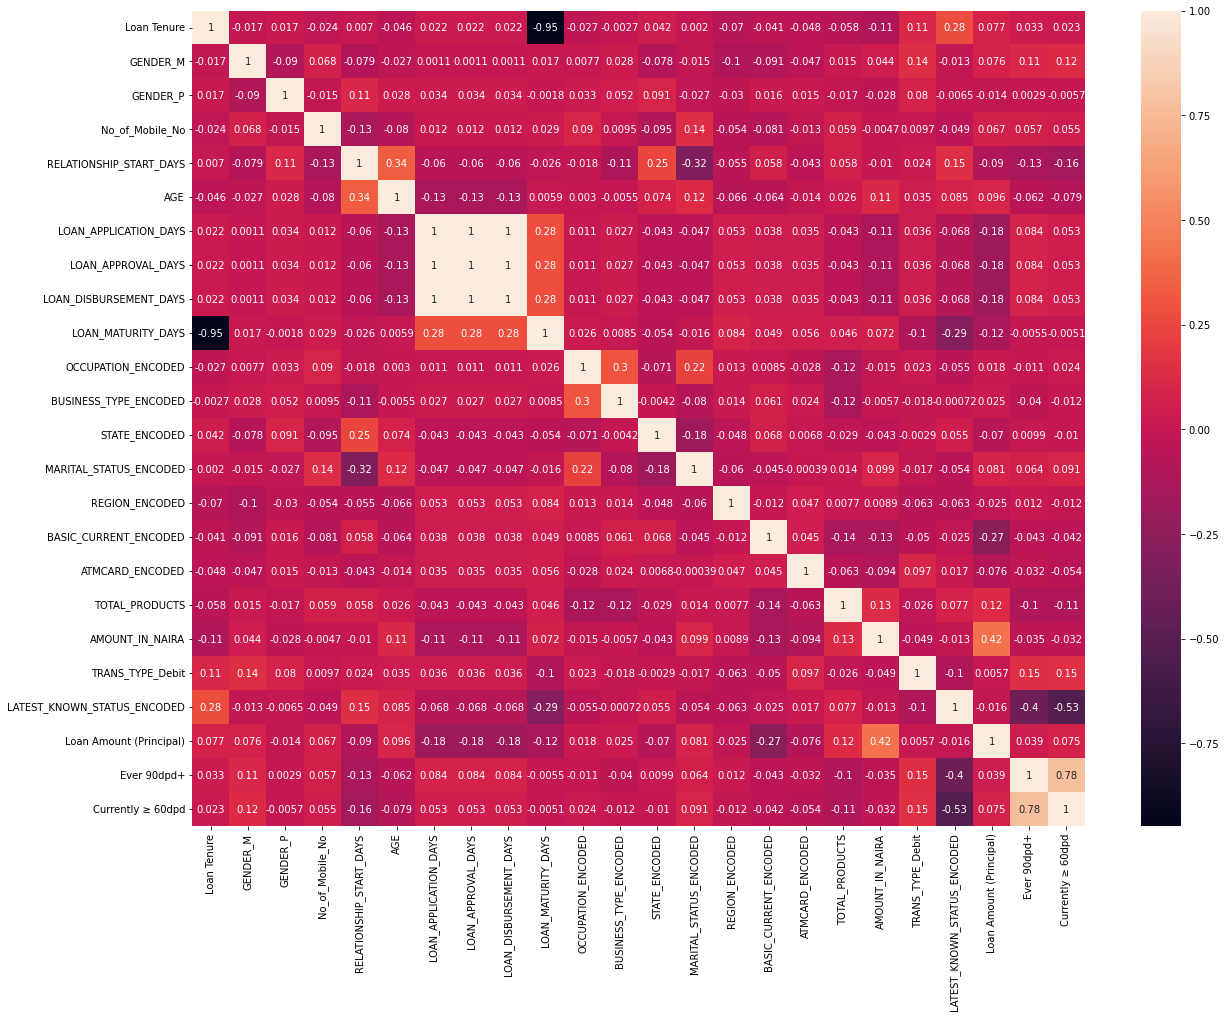

In [40]:

x = df_final.drop(labels=['Bad Indicator'], axis=1)
y = df_final['Bad Indicator']

# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=43)

plt.figure(figsize=(20,15))

# Get corelation matrix and display with Heatmap
corr_matrix = x_train.corr()
figure = sns.heatmap(corr_matrix, annot=True)
plt.show()

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.9)




In [41]:
corr_features 

{'LOAN_APPROVAL_DAYS', 'LOAN_DISBURSEMENT_DAYS', 'LOAN_MATURITY_DAYS'}

In [42]:
# Drop Correlated Columns
x_train = x_train.drop(corr_features, axis=1)
x_test = x_test.drop(corr_features, axis=1)

In [43]:
x_train.describe()

,Loan Tenure,GENDER_M,GENDER_P,No_of_Mobile_No,RELATIONSHIP_START_DAYS,AGE,LOAN_APPLICATION_DAYS,OCCUPATION_ENCODED,BUSINESS_TYPE_ENCODED,STATE_ENCODED,...,REGION_ENCODED,BASIC_CURRENT_ENCODED,ATMCARD_ENCODED,TOTAL_PRODUCTS,AMOUNT_IN_NAIRA,TRANS_TYPE_Debit,LATEST_KNOWN_STATUS_ENCODED,Loan Amount (Principal),Ever 90dpd+,Currently ≥ 60dpd
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,...,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,11.401910,0.731815,0.002939,1.069802,2951.570169,16207.505511,890.176341,370.093314,598.363703,82.891991,...,432.138868,1664.829537,1688.534166,1.727406,23601.195068,0.724135,652.791330,185080.381337,0.227774,0.298310
std,1.922612,0.443177,0.054153,0.254906,2139.073115,3228.582099,19.002664,193.906893,377.270358,76.125173,...,168.044455,442.363926,432.625523,2.346754,23533.380585,0.125662,290.279197,118217.893590,0.419550,0.457684
min,2.000000,0.000000,0.000000,1.000000,1069.000000,8598.000000,847.000000,1.000000,1.000000,1.000000,...,31.000000,151.000000,136.000000,0.000000,1791.605721,0.237500,169.000000,10000.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,1.000000,1345.000000,13855.000000,879.000000,282.000000,157.000000,40.000000,...,420.000000,1794.000000,1809.000000,0.000000,10804.333750,0.652027,415.000000,108000.000000,0.000000,0.000000
50%,12.000000,1.000000,0.000000,1.000000,1996.000000,15958.000000,883.000000,330.000000,429.000000,62.000000,...,513.000000,1794.000000,1809.000000,1.000000,16999.119599,0.742188,418.000000,149000.000000,0.000000,0.000000
75%,12.000000,1.000000,0.000000,1.000000,4025.000000,18363.000000,908.000000,617.000000,962.000000,84.000000,...,587.000000,1794.000000,1809.000000,2.000000,28283.318671,0.819277,943.000000,306000.000000,0.000000,1.000000
max,24.000000,1.000000,1.000000,2.000000,11668.000000,33697.000000,945.000000,617.000000,962.000000,265.000000,...,587.000000,1794.000000,1809.000000,27.000000,301243.173478,0.961945,943.000000,1000000.000000,1.000000,1.000000


# Modeling

In [44]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score

In [45]:
from sklearn.neighbors import KNeighborsClassifier

cv_inner = KFold(n_splits=3, shuffle=True, random_state=43)

space = dict()
space['n_neighbors'] = [5, 10, 25]
space['weights'] = ['uniform', 'distance']
space['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
space['leaf_size'] = [30, 50, 75]

model = KNeighborsClassifier()
search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
result = search.fit(x_train, y_train)
best_model = result.best_estimator_

y_test_pred = best_model.predict(x_test)
y_test_proba = best_model.predict_proba(x_test)

print('test Acc:', accuracy_score(y_test, y_test_pred))
print('test F1:', f1_score(y_test, y_test_pred))
print('test Precision:', precision_score(y_test, y_test_pred))
print('test ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))
print('test Best Params:', result.best_params_)

test Acc: 0.6832191780821918
test F1: 0.25101214574898784
test Precision: 0.4626865671641791
test ROC AUC: 0.5827970297029703
test Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 25, 'weights': 'distance'}


In [46]:
from sklearn.linear_model import LogisticRegression

cv_inner = KFold(n_splits=3, shuffle=True, random_state=43)

space = dict()
space['max_iter'] = [100, 200, 400]
space['fit_intercept'] = [True, False]
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['multi_class'] = ['auto', 'ovr', 'multinomial']

model = LogisticRegression(random_state=43)
search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
result = search.fit(x_train, y_train)
best_model = result.best_estimator_

y_test_pred = best_model.predict(x_test)
y_test_proba = best_model.predict_proba(x_test)

print('test Acc:', accuracy_score(y_test, y_test_pred))
print('test F1:', f1_score(y_test, y_test_pred))
print('test Precision:', precision_score(y_test, y_test_pred))
print('test ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))
print('test Best Params:', result.best_params_)

test Acc: 0.6917808219178082
test F1: 0.4943820224719101
test Precision: 0.5
test ROC AUC: 0.7956958195819582
test Best Params: {'fit_intercept': False, 'max_iter': 400, 'multi_class': 'multinomial', 'penalty': 'l2'}


In [47]:
from sklearn.ensemble import RandomForestClassifier

cv_inner = KFold(n_splits=3, shuffle=True, random_state=43)

space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
space['criterion'] = ['gini', 'entropy']
space['max_features'] = ['auto', 'sqrt', 'log2']

model = RandomForestClassifier(random_state=43)
search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
result = search.fit(x_train, y_train)
best_model = result.best_estimator_

y_test_pred = best_model.predict(x_test)
y_test_proba = best_model.predict_proba(x_test)

print('test Acc:', accuracy_score(y_test, y_test_pred))
print('test F1:', f1_score(y_test, y_test_pred))
print('test Precision:', precision_score(y_test, y_test_pred))
print('test ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))
print('test Best Params:', result.best_params_)

test Acc: 1.0
test F1: 1.0
test Precision: 1.0
test ROC AUC: 1.0
test Best Params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}


In [48]:
from sklearn.naive_bayes import GaussianNB

cv_inner = KFold(n_splits=3, shuffle=True, random_state=43)

space = dict()
space['var_smoothing'] = np.logspace(0,-9, num=100)

model = GaussianNB()
search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
result = search.fit(x_train, y_train)
best_model = result.best_estimator_

y_test_pred = best_model.predict(x_test)
y_test_proba = best_model.predict_proba(x_test)

print('test Acc:', accuracy_score(y_test, y_test_pred))
print('test F1:', f1_score(y_test, y_test_pred))
print('test Precision:', precision_score(y_test, y_test_pred))
print('test ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))
print('test Best Params:', result.best_params_)

test Acc: 0.8698630136986302
test F1: 0.81
test Precision: 0.7363636363636363
test ROC AUC: 0.9188393839383939
test Best Params: {'var_smoothing': 1.2328467394420635e-09}
